### What is Web Scraping?

Web Scraping is the process of extracting data from a website. 

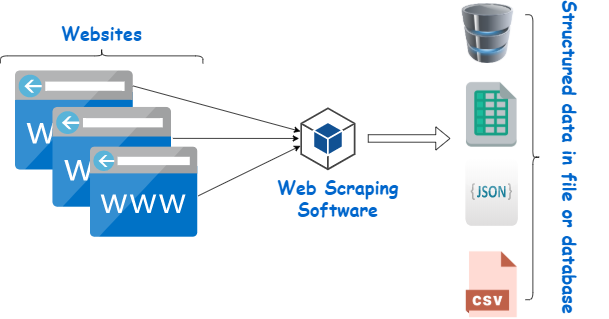

### HTML (Hypertext Markup Language)

In HTML (Hypertext Markup Language), tags are used to structure and format the content of a web page. When performing web scraping, understanding these tags is crucial as they help you locate and extract specific pieces of data from a webpage. Here are some important HTML tags commonly used in web scraping:

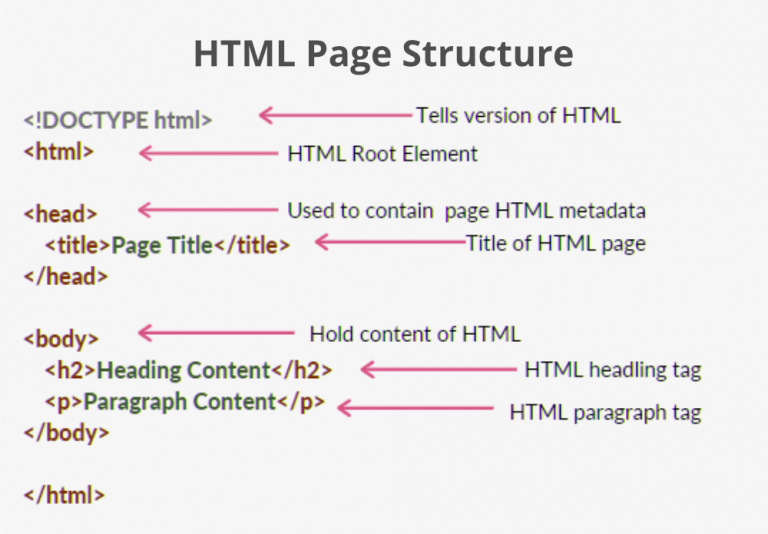

#### Now Let's take a look at the HTML element syntax.

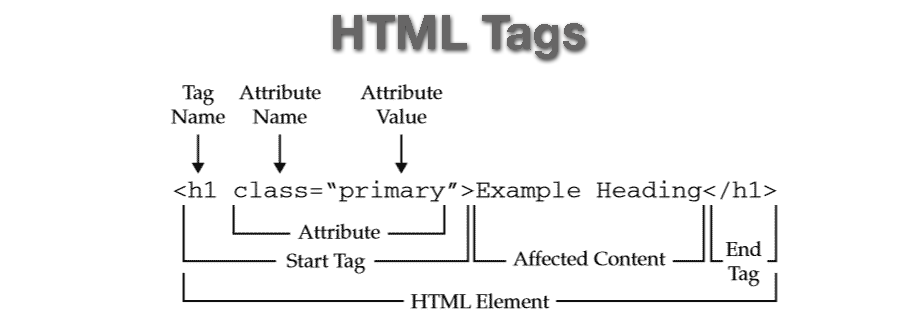

#### This is a single HTML element, but the HTML code behind a website has hundreds of them.

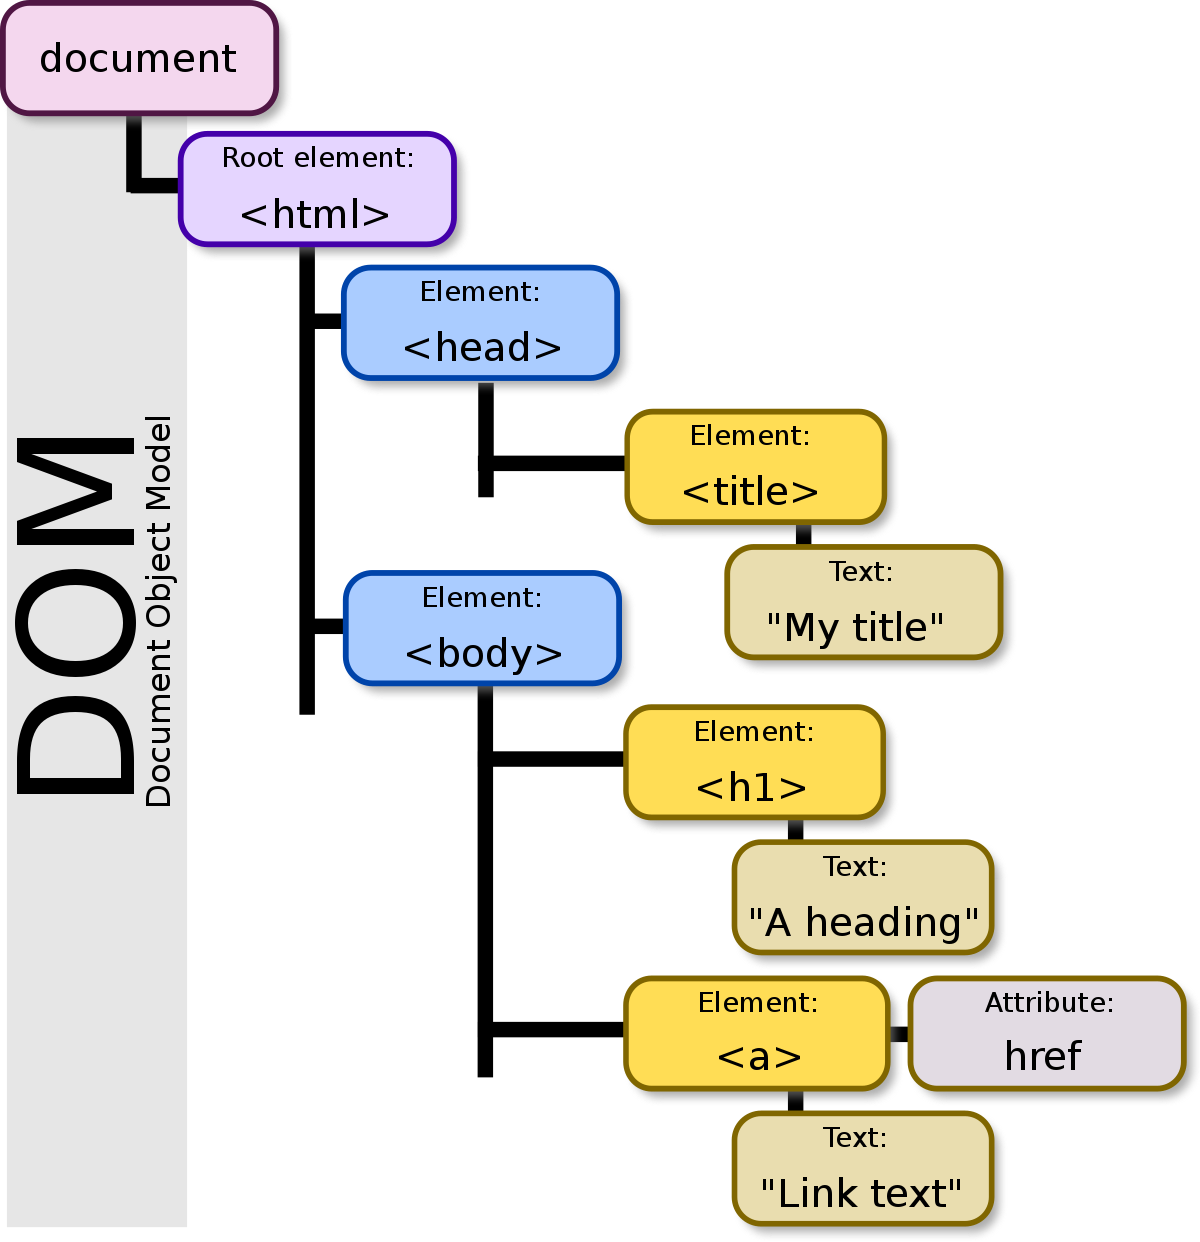

### Installing Necessary Libraries 

In [ ]:
! pip install beautifulsoup4

In [ ]:
! pip install requests          # requests library is used to send the request to the perticular website

#### 1. Importing the libraries


In [35]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

#### 2. Fetch the pages

In [6]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

result = requests.get(url)
print(result.status_code)      # get status code
result

200


<Response [200]>

Now will see frequently encountered and well-known HTTP status codes:
    
1. 2xx (Successful):
    - 200 OK: The request was successful, and the server has returned the requested content.          
2. 3xx (Redirection):
    - 302 Found / 307 Temporary Redirect: The requested resource has been temporarily moved to a new location.        
        
3. 4xx (Client Errors):
    - 400 Bad Request: The server cannot understand the client's request, often due to wrong syntax.            
    - 401 Unauthorized: The client must authenticate itself to get access to the requested resource.           
   - 404 Not Found: The requested resource could not be found on the server.    
    - 429 Too Many Requests: The client has sent too many requests to the server in a given amount of time.            
        
4. 5xx (Server Errors):
   - 500 Internal Server Error: The server encountered an error while processing the request.            
   - 503 Service Unavailable: The server is currently unable to handle the request due to temporary overloading or maintenance of the server.

#### 3. Page Content

In [8]:
content = result.text
content

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of largest companies in the United States by revenue - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";var cookie=document.co

#### 4. Create soup

In [10]:
soup = BeautifulSoup(result.text,'html')
soup

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";var cookie=document.cookie.

#### 5. HTML in a readable format

In [11]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of largest companies in the United States by revenue - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";var cooki

#### 6. Find required elements

Now i want to see how many tables that are available in the soup

In [12]:
len(soup.find_all('table'))

4

In [13]:
soup.find_all('table')

[<table class="box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove" role="presentation"><tbody><tr><td class="mbox-image"><div class="mbox-image-div"><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:Question_book-new.svg"><img alt="" class="mw-file-element" data-file-height="399" data-file-width="512" decoding="async" height="39" src="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/75px-Question_book-new.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/100px-Question_book-new.svg.png 2x" width="50"/></a></span></div></td><td class="mbox-text"><div class="mbox-text-span">This article <b>needs additional citations for <a href="/wiki/Wikipedia:Verifiability" title="Wikipedia:Verifiability">verification</a></b>.<span class="hide-when-compact"> Please help <a href="/wiki/Specia

#### Table 1

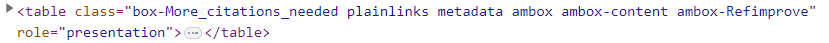

#### Table 2



#### Table 3



#### Table 4



### Now i want to extract 2nd table information so i will use indexing operation

In [14]:
soup.find_all('table')[1]

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [16]:
table = soup.find_all('table')[1]

In [19]:
# Now will find the table header (th:- This tag defines a table header cell within a row)
table.find_all('th')

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [20]:
# Now will extract only the text information that are present in header
[i.text  for i in table.find_all('th')]

['Rank\n',
 'Name\n',
 'Industry\n',
 'Revenue (USD millions)\n',
 'Revenue growth\n',
 'Employees\n',
 'Headquarters\n']

In [22]:
# Now i will be removing the unwanted spaces using strip method
[i.text.strip()  for i in table.find_all('th')]

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

In [38]:
# Now let me store it in a variable called headers
headers = [i.text.strip()  for i in table.find_all('th')]

In [23]:
# Now will find table row information (tr:- This tag defines a table row)
table.find_all('tr')        

[<tr>
 <th>Rank
 </th>
 <th>Name
 </th>
 <th>Industry
 </th>
 <th>Revenue <br/>(USD millions)
 </th>
 <th>Revenue growth
 </th>
 <th>Employees
 </th>
 <th>Headquarters
 </th></tr>,
 <tr>
 <td>1
 </td>
 <td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
 </td>
 <td><a href="/wiki/Retail" title="Retail">Retail</a>
 </td>
 <td style="text-align:center;">611,289
 </td>
 <td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.7%
 </td>
 <td style="text-align:cent

In [24]:
# Now you can see its printing header information so let me use slicing operation and extract from 1 index position

table.find_all('tr')[1:]

[<tr>
 <td>1
 </td>
 <td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
 </td>
 <td><a href="/wiki/Retail" title="Retail">Retail</a>
 </td>
 <td style="text-align:center;">611,289
 </td>
 <td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.7%
 </td>
 <td style="text-align:center;">2,100,000
 </td>
 <td><a href="/wiki/Bentonville,_Arkansas" title="Bentonville, Arkansas">Bentonville, Arkansas</a>
 </td></tr>,
 <tr>
 <td>2
 </td>
 <td><a href="/wiki/Amazon_

In [26]:
# Now will define tr as the variable and store table row information
tr = table.find_all('tr')[1:]

In [27]:
# Now will extract data by using td tag (td :- This tag defines a table data (cell) within a row)

[i.find_all('td') for i in tr]

[[<td>1
  </td>,
  <td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
  </td>,
  <td><a href="/wiki/Retail" title="Retail">Retail</a>
  </td>,
  <td style="text-align:center;">611,289
  </td>,
  <td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.7%
  </td>,
  <td style="text-align:center;">2,100,000
  </td>,
  <td><a href="/wiki/Bentonville,_Arkansas" title="Bentonville, Arkansas">Bentonville, Arkansas</a>
  </td>],
 [<td>2
  </td>,
  <td><a href="/wiki

In [33]:
# Now will try to extract text information from td 
for i in tr:
    td = i.find_all('td')
    for j in td:
        print(j.text)

1

Walmart

Retail

611,289

  6.7%

2,100,000

Bentonville, Arkansas

2

Amazon

Retail and Cloud Computing

513,983

  9.4%

1,540,000

Seattle, Washington

3

Exxon Mobil

Petroleum industry

413,680

  44.8%

62,000

Spring, Texas

4

Apple

Electronics industry

394,328

  7.8%

164,000

Cupertino, California

5

UnitedHealth Group

Healthcare

324,162

  12.7%

400,000

Minnetonka, Minnesota

6

CVS Health

Healthcare

322,467

  10.4%

259,500

Woonsocket, Rhode Island

7

Berkshire Hathaway

Conglomerate

302,089

  9.4%

383,000

Omaha, Nebraska

8

Alphabet

Technology

282,836

  9.8%

156,000

Mountain View, California

9

McKesson Corporation

Health

276,711

  4.8%

48,500

Irving, Texas

10

Chevron Corporation

Petroleum industry

246,252

  51.6%

43,846

San Ramon, California

11

AmerisourceBergen

Pharmaceutical industry

238,587

  11.5%

41,500

Chesterbrook, Pennsylvania

12

Costco

Retail

226,954

  15.8%

304,000

Issaquah, Washington

13

Microsoft

Technol

### Now will create a dataframe and insert all this information in the dataframe

In [40]:
df = pd.DataFrame(columns = headers)

In [41]:
df

Empty DataFrame
Columns: [Rank, Name, Industry, Revenue (USD millions), Revenue growth, Employees, Headquarters]
Index: []

In [42]:
for i in tr:
    td = i.find_all('td')
    df.loc[df.shape[0]] = [j.text.strip()  for j in td]

In [43]:
df

Rank                      Name                    Industry  \
0     1                   Walmart                      Retail   
1     2                    Amazon  Retail and Cloud Computing   
2     3               Exxon Mobil          Petroleum industry   
3     4                     Apple        Electronics industry   
4     5        UnitedHealth Group                  Healthcare   
..  ...                       ...                         ...   
95   96                  Best Buy                      Retail   
96   97      Bristol-Myers Squibb     Pharmaceutical industry   
97   98           United Airlines                     Airline   
98   99  Thermo Fisher Scientific      Laboratory instruments   
99  100                  Qualcomm                  Technology   

   Revenue (USD millions) Revenue growth  Employees             Headquarters  
0                 611,289           6.7%  2,100,000    Bentonville, Arkansas  
1                 513,983           9.4%  1,540,000      Seattle, Washington  
2                 413,680          44.8%     62,000            Spring, Texas  
3                 394,328           7.8%    164,000    Cupertino, California  
4                 324,162          12.7%    400,000    Minnetonka, Minnesota  
..                    ...            ...        ...                      ...  
95                 46,298          10.6%     71,100     Richfield, Minnesota  
96                 46,159           0.5%     34,300  New York City, New York  
97                 44,955          82.5%     92,795        Chicago, Illinois  
98                 44,915          14.5%    130,000   Waltham, Massachusetts  
99                 44,200          31.7%     51,000    San Diego, California  

[100 rows x 7 columns]